References:
* https://github.com/JustGlowing/minisom
* https://github.com/JustGlowing/minisom/blob/master/examples/BasicUsage.ipynb
* https://towardsdatascience.com/understanding-self-organising-map-neural-network-with-python-code-7a77f501e985

## **Introduction**

Information about Iris Dataset from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

Classes: 3

Samples per class: 50

Samples total: 150

Dimensionality: 4

Features: real, positive

In [1]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=96237ccbf3d311b0f8e2fa9de5c05d12dfd506863268a162559818eecb6ebb6e
  Stored in directory: /root/.cache/pip/wheels/6d/4e/9e/a95c14a232a196c22d9c04b221ff5d25461a1a4c55339c61db
Successfully built minisom


In [2]:
from minisom import MiniSom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation , colors
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib
import matplotlib.cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

## Upload the data set

In [3]:
iris = load_iris()

In [4]:
X = iris.data
y = iris.target

In [5]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=42)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape) # check the shapes

(135, 4) (135,) (15, 4) (15,)


## **Hyperparameters**:
* x: x dimension of the SOM
* y: y dimension of the SOM
* input_len: number of the elements os the vectors in the input
* sigma: spread of the neighborhood function (sigma(t) = sigma / (1+t/T))
* learning_rate (learning_rate(t)=learning_rate/(1+t/T))
* decay_function (function that reduces learning_rate and sigma at each interaction)
* neighborhood_function (default=gaussian): function that weights the neighborhood of a position in the map
* topology (rectangular (default) or hexagonal)
* activation_distance: distance used to active the map (euclidean (default), consine,manhattan, chebyshev)


In [65]:
n_neurons=8
m_neurons=8
input_len=4
sigma=1.0
learning_rate=1.0

In [66]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma,learning_rate)

In [67]:
som.train(train_x,10000,verbose=True) #train with 10000 interactions

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.15714346551656241


In [68]:
som.winner(train_x[0])

(4, 4)

## **Definitions** 
Reference: Evaluating Self-Or aluating Self-Organizing Map Quality Measur ganizing Map Quality Measures as Conv es as Convergence
Criteria (from Gregory T. Breard )

**Quantization error**:  is a measure of the average distance between the data points and the map nodes to which they are mapped, with smaller values indicating a better fit.

**Topographic error**: TE is calculated by finding the best-matching and second-best-matching neuron in the map for each input and then evaluating the positions. If the nodes are next to each other, then we say topology has been preserved for this input. If not, then this is counted as an error. The total number of errors divided by the total number of data points gives the topographic error of the map.



# Distance Map (U-Matrix)

adapted from https://github.com/JustGlowing/minisom/blob/master/examples/BasicUsage.ipynb

The neurons of the maps are displayed as an array of cells and the colors represet the (weights) distance frmo the neighbours neurons. On the top of the pseudoclors, we can add markers that represent the samples mapped in the specific cells.

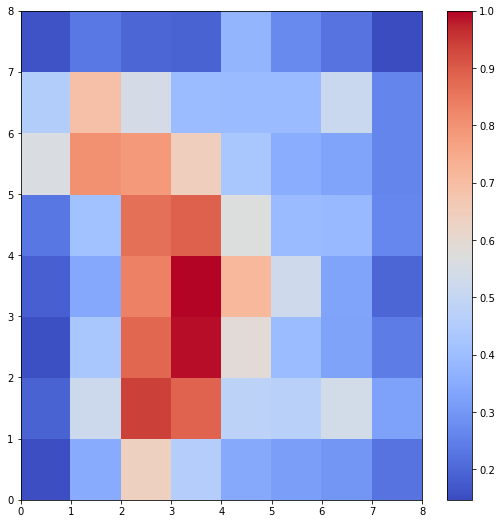

In [69]:
plt.figure(figsize=(9, 9))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # plotting the distance map as background
plt.colorbar()
plt.show()

Na U-Matrix da região anteior, as regiões azuis são as regiões nas quais as diferenças entre um neurônio e os seus vizinhos são pequenas. Essas regiões correspondem, em geral, aos lugares onde se encontram os clusters, que agrupam elementos semelhantes (por vezes, elementos de mesma classe, embora não haja informação de classe durante o treinamento da rede). Por outro lado, as regiões vermelhas são lugares nos quais as distâncias entre um neurônio e seus vizinhos são grandes, e, observando o Scatter Chart mostrado abaixo, nota-se que essa região vermelha corresponde justamente a uma zona de transição entre clusters, na qual, vizinhos não tem distâncias euclideanas pequenas.

# Samples per class falling in a specific neuron

CÓDIGO RETIRADO DE https://github.com/JustGlowing/minisom/blob/master/examples/BasicUsage.ipynb

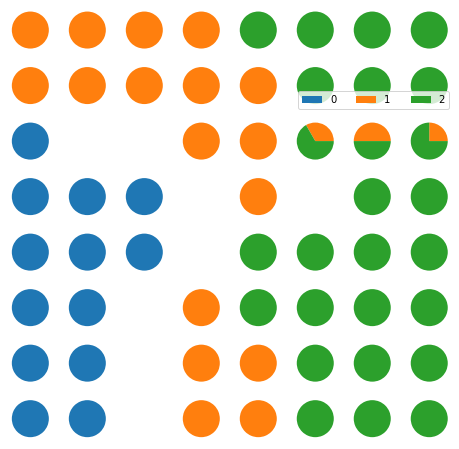

In [70]:
import matplotlib.gridspec as gridspec

label_names = {0:'0',1:'1', 2:'2'}
target = []
for i in range(len(train_y)):
  target.append(train_y[i])

labels_map = som.labels_map(train_x, [label_names[t] for t in target])

fig = plt.figure(figsize=(8, 8))
the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names.values()]
    plt.subplot(the_grid[n_neurons-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_names.values(), bbox_to_anchor=(3.5, 6.5), ncol=3)
plt.show()


Da figura anterior, notamos que grande parte neurônios acabam sendo associados sempre a dígitos de mesma natureza, enquanto outros ficam divididos entre uma pequena quantidade de diferentes tipos de dígitos. Isso mostra que os neurônios realmente vão se adequando a tipos específicos de entradas, o que mostra seu poder de clusterização.

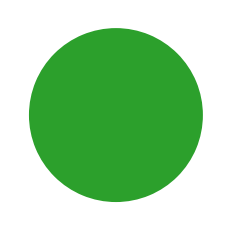

In [79]:
patches, texts = plt.pie(label_fracs)

In [81]:
texts

[Text(1.1, 0.0, ''),
 Text(1.1, 0.0, ''),
 Text(-1.1, 1.3471114790620887e-16, '')]

## **Show labels to the trained SOM**
baseado em 

https://datagy.io/python-get-dictionary-key-with-max-value/#:~:text=The%20simplest%20way%20to%20get,What%20is%20this%3F&text=What%20we%20can%20see%20here,max%20value%20of%20that%20iterable.

https://towardsdatascience.com/understanding-self-organising-map-neural-network-with-python-code-7a77f501e985

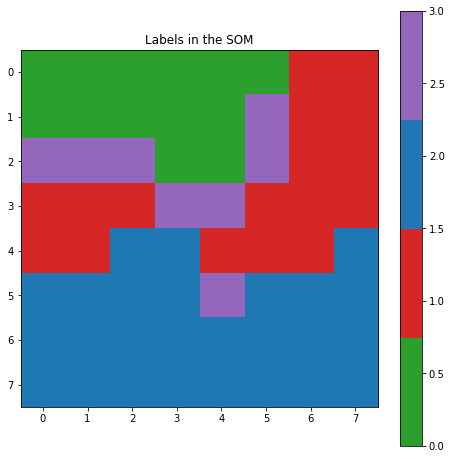

In [71]:
label_names = {0:'0',1:'1', 2:'2'}
target = []
for i in range(len(train_y)):
  target.append(train_y[i])

labels_map = som.labels_map(train_x, [label_names[t] for t in target])

mapa = np.zeros(shape=(n_neurons,m_neurons),dtype=np.int64)
for row in range(n_neurons):
  for col in range(m_neurons):
    if(type(labels_map[row,col]) !=list): #usamos esse if, pois se um neurônio nunca foi ativado, labels_map é uma lista, e não dicionário
      max_value = max(labels_map[row,col],key = labels_map[row,col].get)
      mapa[row][col] = max_value
    else:
      mapa[row,col]=3

fig = plt.figure(figsize=(8, 8))
cmap = ListedColormap(['tab:green', 'tab:red','tab:blue','tab:purple'])  
plt.imshow(mapa,cmap=cmap)
plt.colorbar()
plt.title('Labels in the SOM')
plt.show()

# Scatter Chart

adapted from https://github.com/JustGlowing/minisom/blob/master/examples/BasicUsage.ipynb

Um offset aleatório foi acrescentado para impedir a sobreposição de pontos dentro da mesma célula

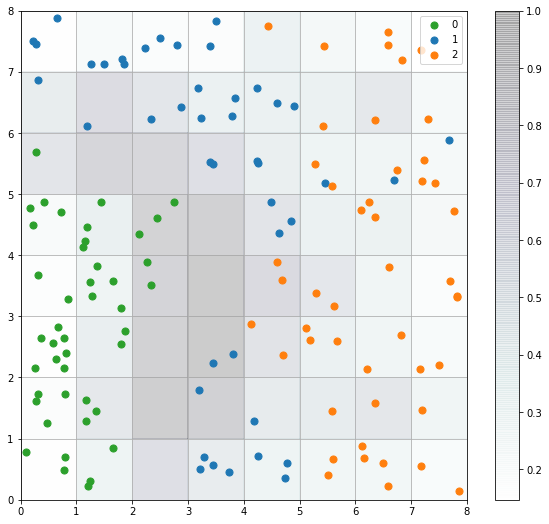

In [72]:
colors = ['C0', 'C1', 'C2']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

Dos três gráficos acima, podemos ver claramente que foi possível realizar a separação das três classes. Note que, poucas vezes, algum neurônio acaba recebendo entrandas de classes diferentes.

## **Outlier Detection**

adapted from https://github.com/JustGlowing/minisom/blob/master/examples/OutliersDetection.ipynb

In [19]:
n_neurons=8
m_neurons=8
input_len=4
sigma=1.0
learning_rate=1.0
outliers_percentage = 0.05 #vamos considerar apenas os 5% com maior erro de quantização

som = MiniSom(n_neurons,m_neurons,input_len,sigma,learning_rate)
som.train(train_x,10000,verbose=True) #train with 10000 interactions

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.15785025725702787


Error treshold: 0.3196397896662508


Text(0, 0.5, 'frequency')

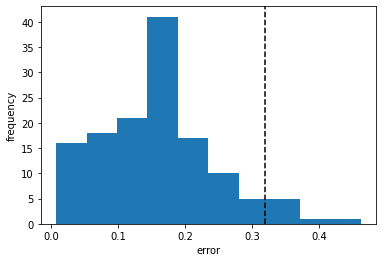

In [20]:
som.quantization(train_x).shape
quantization_errors = np.linalg.norm(som.quantization(train_x) - train_x, axis=1)
quantization_errors
error_treshold = np.percentile(quantization_errors, 100*(1-outliers_percentage))

print('Error treshold:', error_treshold)

is_outlier = quantization_errors > error_treshold

plt.hist(quantization_errors)
plt.axvline(error_treshold, color='k', linestyle='--')
plt.xlabel('error')
plt.ylabel('frequency')

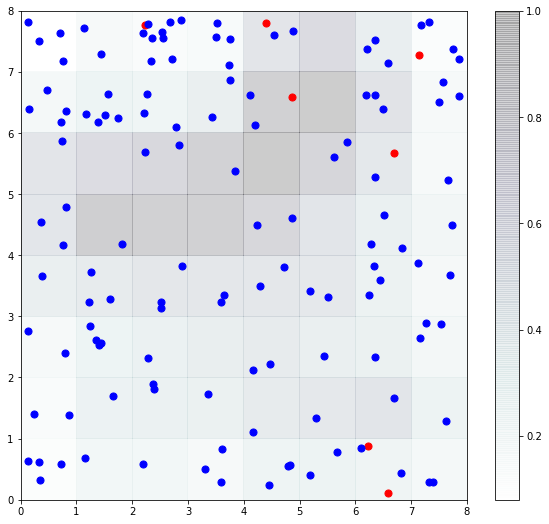

In [21]:
colors = ['C0', 'C1', 'C2']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

np.random.seed(42)

plt.scatter(w_x[is_outlier]+.5+(np.random.rand(np.sum(is_outlier))-.5)*.8,
                w_y[is_outlier]+.5+(np.random.rand(np.sum(is_outlier))-.5)*.8, 
                s=50, c='red', label='outlier')

plt.scatter(w_x[~is_outlier]+.5+(np.random.rand(np.sum(~is_outlier))-.5)*.8,
                w_y[~is_outlier]+.5+(np.random.rand(np.sum(~is_outlier))-.5)*.8, 
                s=50, c='blue', label='inlier')

Os pontos marcados em vermelho na figura anterior são os que consideramos outliers, isto é, são os 5% pontos com maior erro de quantização.

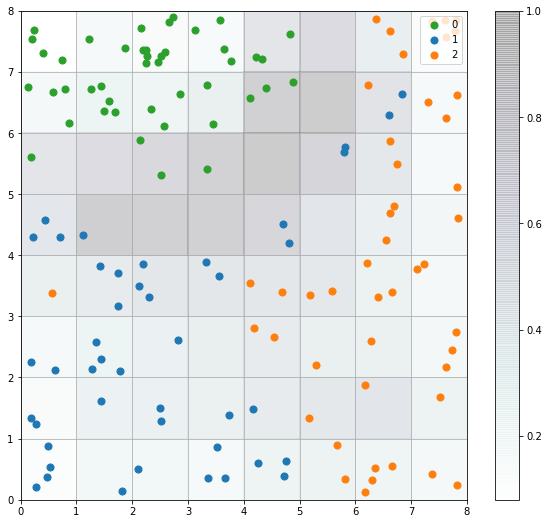

In [23]:
colors = ['C0', 'C1', 'C2']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

np.random.seed(42)

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
#plt.scatter(w_x[is_outlier]+.5+(np.random.rand(np.sum(is_outlier))-.5)*.8,
#                w_y[is_outlier]+.5+(np.random.rand(np.sum(is_outlier))-.5)*.8, 
#                s=50, c='black', label='outlier')


plt.legend(loc='upper right')
plt.grid()
plt.show()



## **Plot of the Quantization Error and Topographic Error**

adapted from https://github.com/JustGlowing/minisom/blob/master/examples/BasicUsage.ipynb

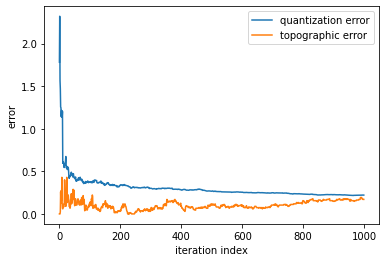

In [ ]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma,learning_rate)

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(train_x))
    som.update(train_x[rand_i], som.winner(train_x[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(train_x))
    t_error.append(som.topographic_error(train_x))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iteration index')
plt.legend()
plt.show()


# Análise da Variação de Hiperparâmetros

In [27]:
n_neurons=8
m_neurons=8
input_len=4
sigma=1.0
learning_rate=1.0

In [28]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma,learning_rate=1)
som.train(train_x,100,verbose=True) 

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.35972153601344303


# Scatter Chart

adapted from https://github.com/JustGlowing/minisom/blob/master/examples/BasicUsage.ipynb

Um offset aleatório foi acrescentado para impedir a sobreposição de pontos dentro da mesma célula

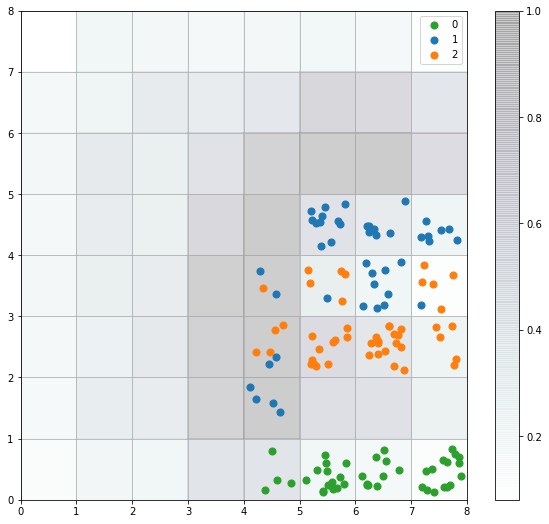

In [29]:
colors = ['C0', 'C1', 'C2']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

É interessante notar que, com menos iterações (apenas 100), muitos neurônios não são atividados nunca, porque a rede não teve tempo suficiente de treinamento para ativá-los.

## Análise da influência do sigma

In [31]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=0.1,learning_rate=1)
som.train(train_x,1000,verbose=True) #train with 1000 interactions

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.8827105869472621


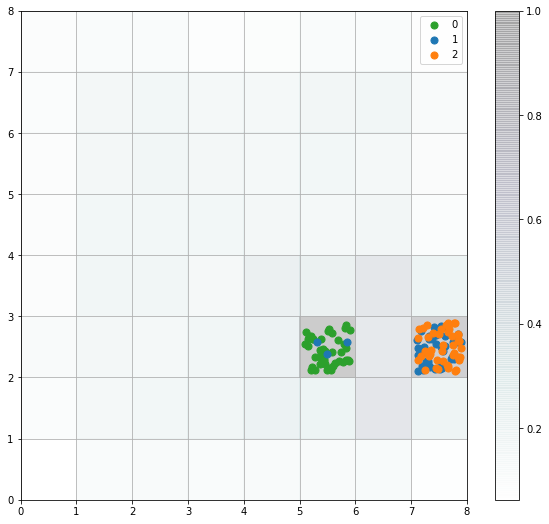

In [32]:
colors = ['C0', 'C1', 'C2']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

Utilizando sigma igual a 0.1 o que se observa é que a vizinhança é muito pequena, de forma que, quando um neurônio é o vencedor, apenas ele é atualizado e os seus vizinhos, na prática, não são atualizados. Dessa forma, tem-se um grande numero de neurônios que nunca é ativado, e os poucos que são ativados acabam por não conseguirem fazer distinção entre os tipos diferentes de entradas. O treinamento da rede nesse caso tem um resultado muito ruim, o que pode se verificar pelo erro de quantização maior do que 30.

In [33]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=0.4,learning_rate=1)
som.train(train_x,1000,verbose=True) #train with 1000 interactions

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.5132577958948908


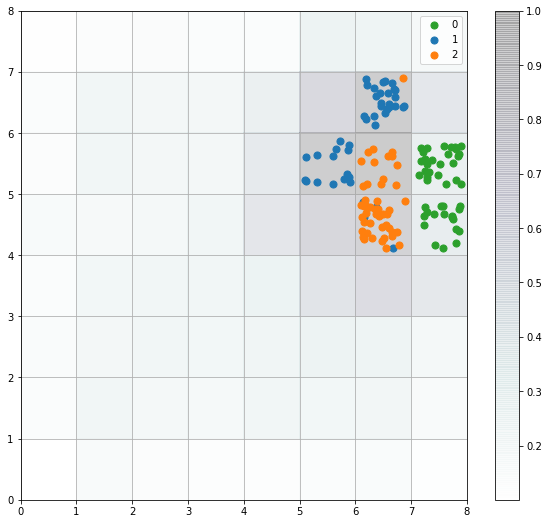

In [34]:
colors = ['C0', 'C1', 'C2']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

Com sigma igual a 0.4, acontece efeito semelhante (e muitos neurônios acabam não sendo ativados nunca), mas não é tão drástico quanto com sigma igual a 0.1.

In [35]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=10,learning_rate=1)
som.train(train_x,10000,verbose=True) #train with 10000 interactions

/usr/local/lib/python3.8/dist-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.6461426908422366


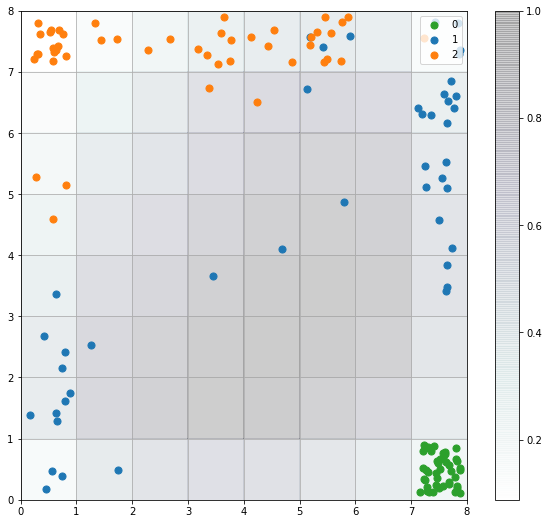

In [36]:
colors = ['C0', 'C1', 'C2']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

Por outro lado, escolhendo um valor de sigma muito grande (como 10), mesmo neurônios muito distantes do vencedor são frequentemente atualizados. Dessa forma, poderia haver uma tendência de os neurônios não conseguirem se especialziar nos diferentes tipos de classes e acabarem fazendo mistura de classes. Entretanto, como o dataset Iris é muito simples, a rede acaba por conseguir diferenciar as classes mesmo assim.

## Análise da influência da quantidade de iterações

In [37]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=0.5,learning_rate=1)
som.train(train_x,50,verbose=True) #train with 10000 interactions
qe1 = som.quantization_error(train_x)

som = MiniSom(n_neurons,m_neurons,input_len,sigma=0.5,learning_rate=1)
som.train(train_x,100,verbose=True) #train with 10000 interactions
qe2 = som.quantization_error(train_x)

som = MiniSom(n_neurons,m_neurons,input_len,sigma=0.5,learning_rate=1)
som.train(train_x,500,verbose=True) #train with 10000 interactions
qe3 = som.quantization_error(train_x)

 [ 50 / 50 ] 100% - 0:00:00 left 
 quantization error: 0.9637996020040707
 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.6140406632729306
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.5200468459284083


In [38]:
print("Erro de quantização com 100 iterações: {}".format(qe1))
print("Erro de quantização com 1000 iterações: {}".format(qe2))
print("Erro de quantização com 1000 iterações: {}".format(qe3))

Erro de quantização com 100 iterações: 0.9637996020040707
Erro de quantização com 1000 iterações: 0.6140406632729306
Erro de quantização com 1000 iterações: 0.5200468459284083


O efeito da quantidade de iterações é simples: quanto maior a quantidade de iterações, mais a rede é treinada e portanto, o erro de quantização diminui. Isso significa que os neurônios vencedores passam a ser mais próximos e mais representativos das entradas.

## Análise da quantidade de neurônios

In [39]:
n_neurons=15
m_neurons=15
input_len=4
sigma=1.0
learning_rate=1.0

In [40]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=1,learning_rate=1)
som.train(train_x,100,verbose=True) #train with 10000 interactions

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.326015706115762


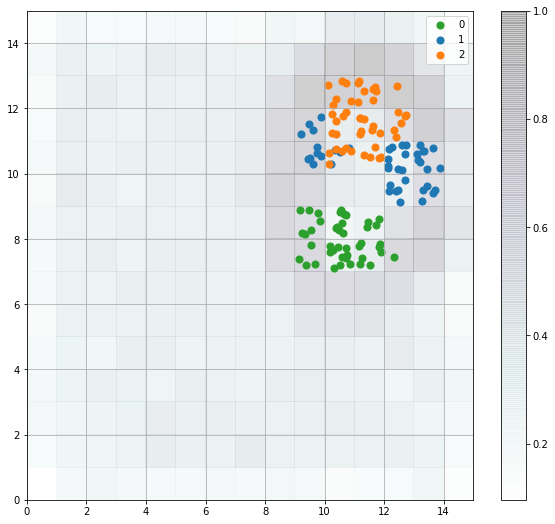

In [41]:
colors = ['C0', 'C1', 'C2']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

Com uma grande quantidade de neurônios (15x15), nota-se que é possível separar as diferentes classes. Entretanto, muitos neurônios ficam desativados sempre, o que mostra que essa grande quantidade na verdade é desnecessária e boa parte do mapa não é utilizado.

Para se usar toda a extensão do mapa, mesmo com o mapa aumentado, é necessário aumentar o valor inicial do sigma, que define a vizinhança, como mostraremos a seguir.

In [42]:
n_neurons=15
m_neurons=15
input_len=4
sigma=4.0
learning_rate=1.0

In [43]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=sigma,learning_rate=learning_rate)
som.train(train_x,100,verbose=True) #train with 10000 interactions

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.25074740231224657


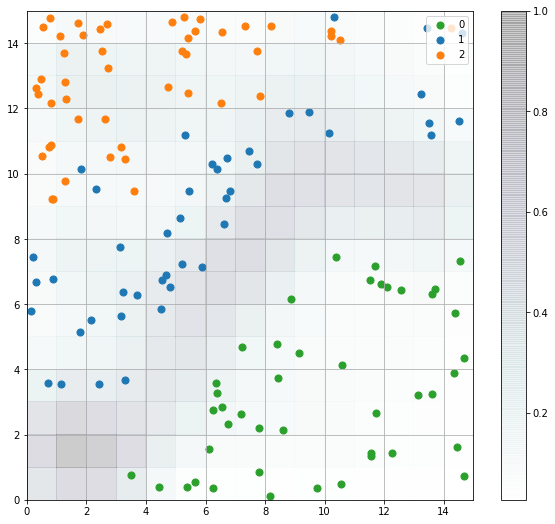

In [44]:
colors = ['C0', 'C1', 'C2']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

Com um sigma maior (sigma=4), agora pudemos observar que diferentemente da situação anterior, os exemplos não ficaram mais concentrados em poucos neurônios, mas sim espalhados por toda a extensão do mapa.

In [45]:
n_neurons=2
m_neurons=2
input_len=4
sigma=1.0
learning_rate=1.0

In [46]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=1,learning_rate=1)
som.train(train_x,100,verbose=True) #train with 10000 interactions

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.6708651911579282


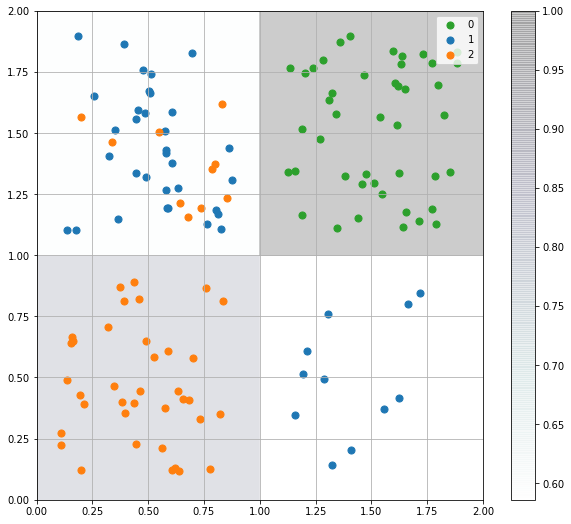

In [47]:
colors = ['C0', 'C1', 'C2']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

Usando apenas 4 neurônios e uma quantidade de 100 iterações, notamos que pudemos separar completamente a classe laranja e a verde. Entretanto, ainda há mistura entre a classe azul e a laranja. Vejamos o que acontece se aumentarmos a quantidade de iterações, mantendo a quantidade de neurônios.

In [48]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=1,learning_rate=1)
som.train(train_x,1000,verbose=True) #train with 10000 interactions

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.6371815612958269


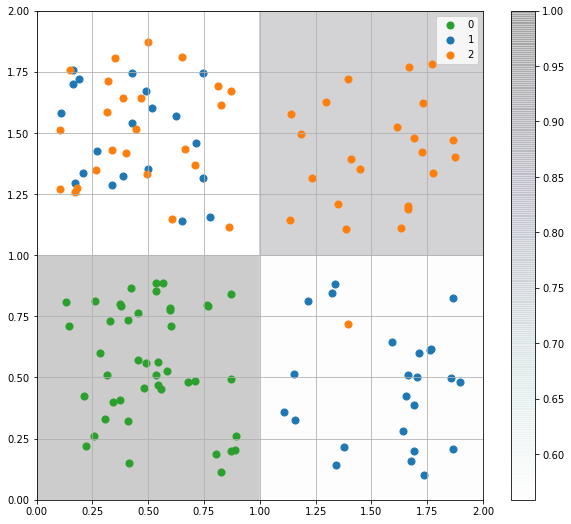

In [49]:
colors = ['C0', 'C1', 'C2']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

Mesmo realizando 1000 iterações, ainda há mistura entre as classes azul e laranja.

In [50]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=1,learning_rate=1)
som.train(train_x,50000,verbose=True) #train with 10000 interactions

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 0.6135085467112926


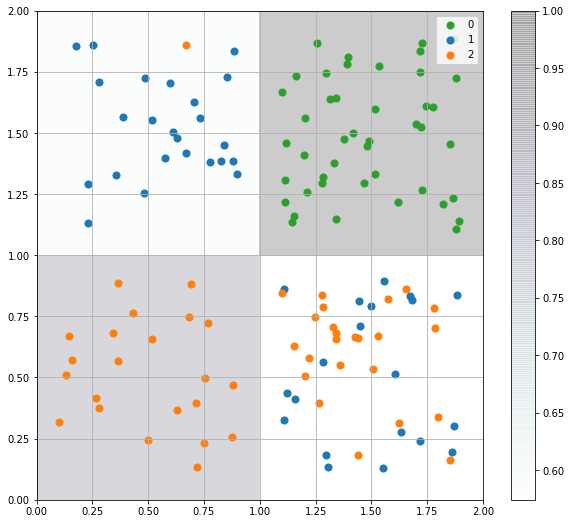

In [51]:
colors = ['C0', 'C1', 'C2']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

Realizando 50000 iterações, as classes laranja e azul continuam misturadas.

In [ ]:
n_neurons=8
m_neurons=8
input_len=4
sigma=1.0
learning_rate=1.0

som = MiniSom(n_neurons,m_neurons,input_len,sigma=1,learning_rate=1)
som.train(train_x,50000,verbose=True) #train with 10000 interactions

 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 0.15172485026443105


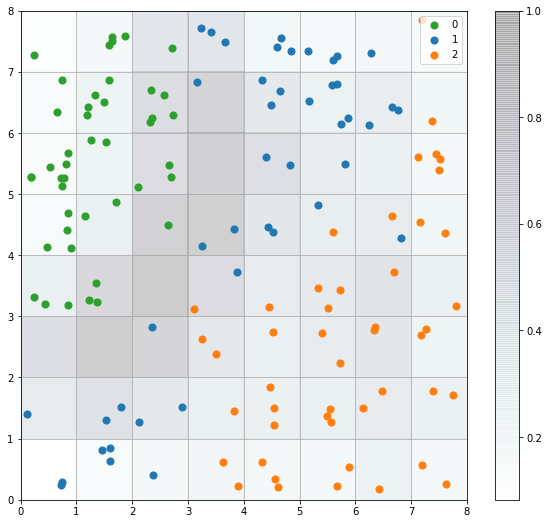

In [ ]:
colors = ['C0', 'C1', 'C2']

w_x, w_y = zip(*[som.winner(d) for d in train_x])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

Fazendo 50000 iterações e aumentando a quantidade de neurônios para 64, finalmente conseguimos baixar bastante o erro de quantização e verificamos apenas 3 neurônios nos quais há elementos de duas classes diferentes.

## Análise da influência da learning rate

In [58]:
n_neurons=8
m_neurons=8
input_len=4
sigma=1.0
learning_rate=1.0

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.20474171743152905


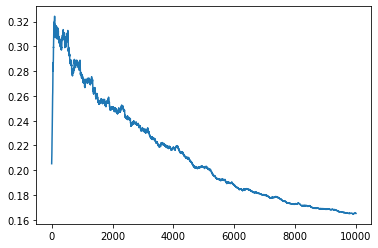

In [59]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=1,learning_rate=0.2)
som.train(train_x,10000,verbose=True) #train with 10000 interactions
qe1 = som.quantization_error(train_x)

max_iter = 10000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(train_x))
    som.update(train_x[rand_i], som.winner(train_x[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(train_x))
    t_error.append(som.topographic_error(train_x))

plt.plot(np.arange(max_iter), q_error, label='quantization error')

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.17351587007772443


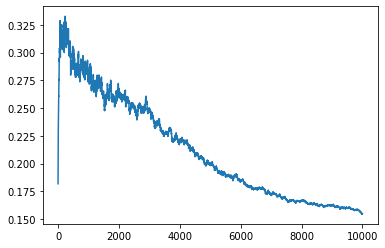

In [60]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=1,learning_rate=0.5)
som.train(train_x,10000,verbose=True) #train with 10000 interactions
qe2 = som.quantization_error(train_x)

max_iter = 10000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(train_x))
    som.update(train_x[rand_i], som.winner(train_x[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(train_x))
    t_error.append(som.topographic_error(train_x))

plt.plot(np.arange(max_iter), q_error, label='quantization error')

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.16496233221885492


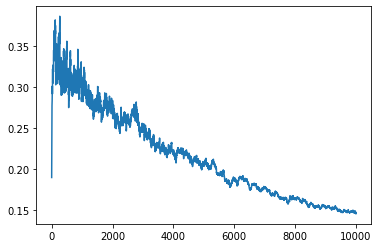

In [61]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=1,learning_rate=1.0)
som.train(train_x,10000,verbose=True) #train with 10000 interactions
qe3 = som.quantization_error(train_x)

max_iter = 10000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(train_x))
    som.update(train_x[rand_i], som.winner(train_x[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(train_x))
    t_error.append(som.topographic_error(train_x))

plt.plot(np.arange(max_iter), q_error, label='quantization error')

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.248039704604675


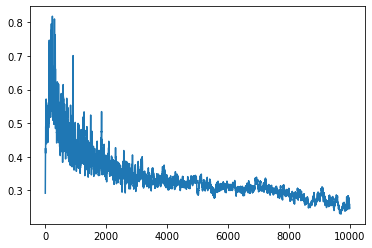

In [62]:
som = MiniSom(n_neurons,m_neurons,input_len,sigma=1,learning_rate=5.0)
som.train(train_x,10000,verbose=True) #train with 10000 interactions
qe4 = som.quantization_error(train_x)

max_iter = 10000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(train_x))
    som.update(train_x[rand_i], som.winner(train_x[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(train_x))
    t_error.append(som.topographic_error(train_x))

plt.plot(np.arange(max_iter), q_error, label='quantization error')

In [64]:
print("Erro de quantização com learning_Rate 0.2: {}".format(qe1))
print("Erro de quantização com learning_Rate 0.5: {}".format(qe2))
print("Erro de quantização com learning_Rate 1.0: {}".format(qe3))
print("Erro de quantização com learning_Rate 5.0: {}".format(qe4))

Erro de quantização com learning_Rate 0.2: 0.20474171743152905
Erro de quantização com learning_Rate 0.5: 0.17351587007772443
Erro de quantização com learning_Rate 1.0: 0.16496233221885492
Erro de quantização com learning_Rate 5.0: 0.248039704604675


Observamos que, mantendo fixa a quantidade de iterações, learning_rate iniciais maiores trouxeram um menor erro de quantização no final. Entretanto, isso não é algo que é observado sempre. Tomando o caso limite de uma learning rate muito alta, como por exemplo 5, nota-se que o erro de quantização se torna muito grande, o que mostra que a rede não consegue aprender bem os padrões.
Deve-se buscar uma learning rate inicial que seja ótima.